## Initial Exploration

In [7]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
from scipy.stats import kstest
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors


In [8]:
current_folder = globals()['_dh'][0]

In [9]:
all_data = pd.read_csv(Path(current_folder).parent / 'data' / 'creditcard.csv')

In [4]:
all_data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


To protect the user data the provder has created PCA vectors from the features

In [5]:
all_data[all_data.columns[[0, 1, 2, -2, -1]]].describe()

,Time,V1,V2,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,25691.160000,1.000000


In [6]:
all_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


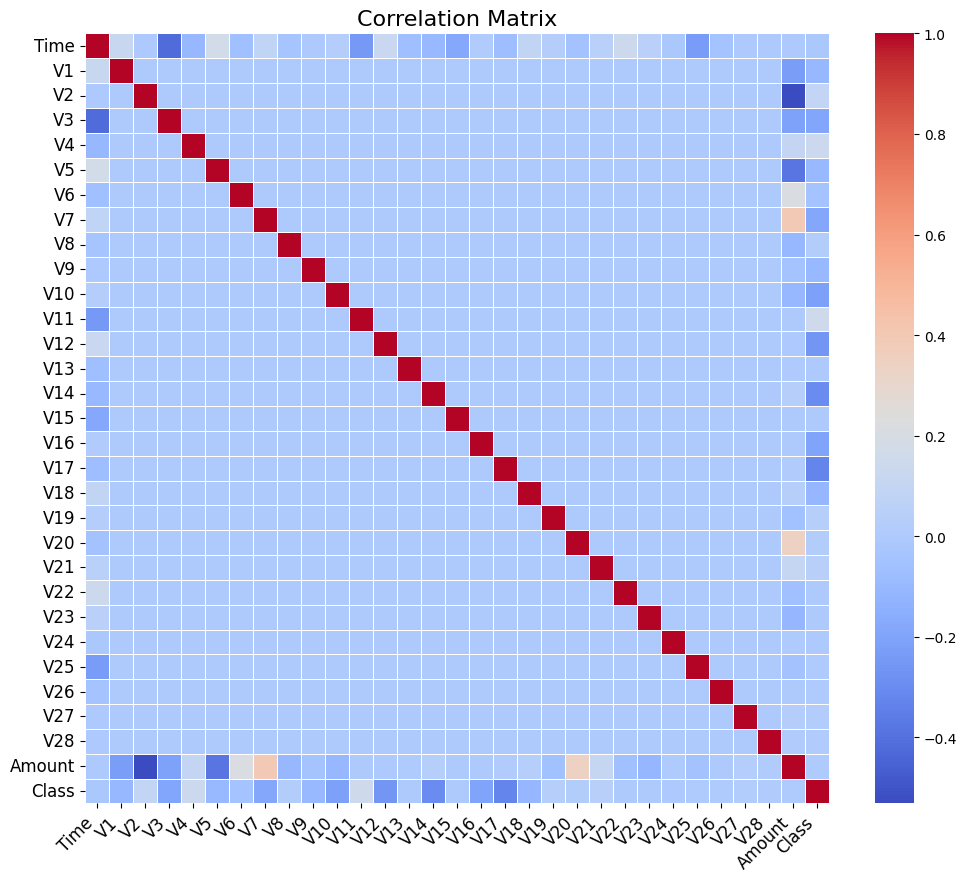

In [7]:
plt.figure(figsize=(12, 10))

sns.heatmap(all_data.corr(), annot=False, cmap="coolwarm", linewidths=0.5)

plt.xticks(fontsize=12, rotation=45, ha="right")
plt.yticks(fontsize=12, rotation=0)

plt.title("Correlation Matrix", fontsize=16)

plt.show()

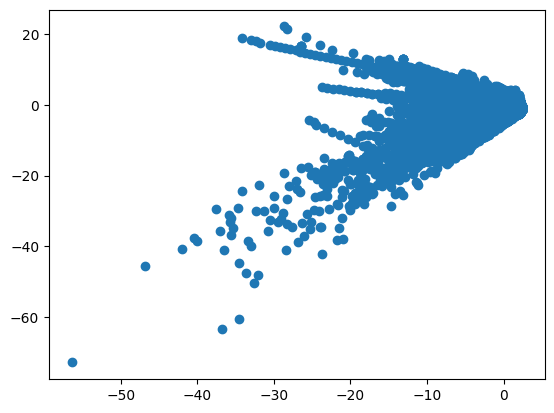

In [8]:
plt.scatter(all_data['V1'], all_data['V2'])
plt.show()

We would not expect high degrees of correlation between vectors as a vector attempts to capture the most variance possbile. Principal components should be orthoganal.

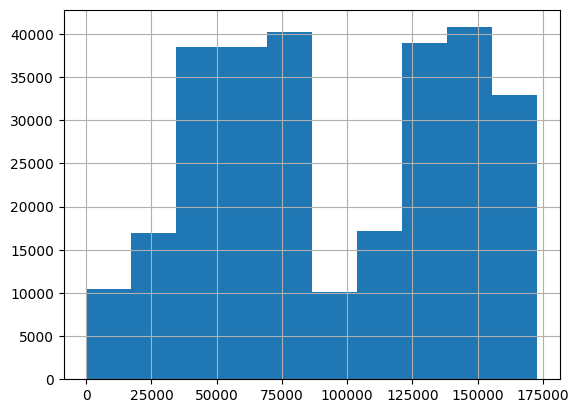

In [9]:
all_data['Time'].hist()
plt.show()

Time is in seconds since the last transaction over 2 days. The data shows a clear day/night cycle so it may be fair to assume that this data has either had timezone corrected or is from the same timezone which is consistent with the description (the description says European Data but does not specify if that is to one country max +3 hours).

In [10]:
all_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

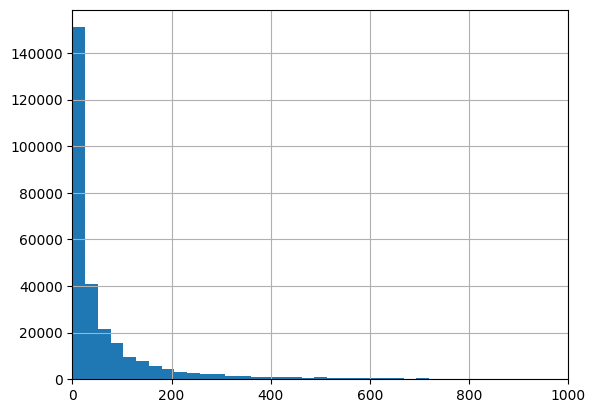

In [11]:
all_data['Amount'].hist(bins=1000)
plt.xlim(0,1000)
plt.show()

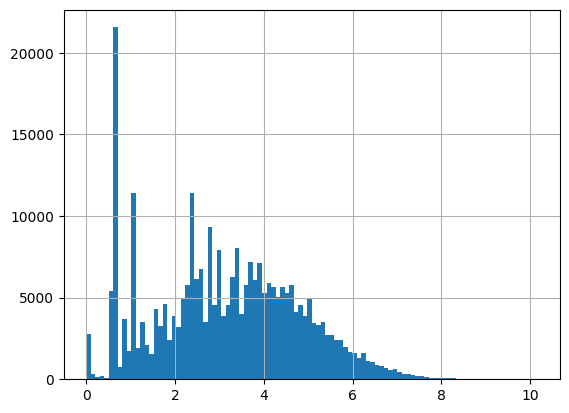

In [12]:
np.log(all_data['Amount'] +1).hist(bins=100)
plt.show()

In [13]:
stat, p = kstest(np.log(all_data['Amount'].dropna() + 1), 'norm')
print(f'KS Statistic={stat:.4f}, p-value={p:.4f}')

KS Statistic=0.7367, p-value=0.0000


In [14]:
stat, p = kstest(all_data['Amount'].dropna() + 1, 'norm')  
print(f'KS Statistic={stat:.4f}, p-value={p:.4f}')

KS Statistic=0.9461, p-value=0.0000


In [15]:
all_data.loc[all_data['Class'] == 1, 'Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

<Axes: >

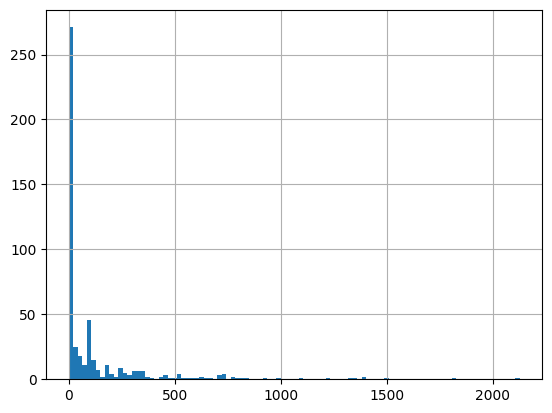

In [16]:
all_data.loc[all_data['Class'] == 1, 'Amount'].hist(bins=100)

In [17]:
all_data.loc[all_data['Class'] == 0, 'Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [18]:
all_data.dropna()['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

No data gets dropped with dropna. Many of the transactions 

In [19]:
all_data.loc[all_data['Class'] == 1, 'Amount'].value_counts(normalize=True).sort_values()

Amount
3.76      0.002033
245.00    0.002033
42.53     0.002033
59.00     0.002033
730.86    0.002033
            ...   
0.77      0.020325
0.76      0.034553
99.99     0.054878
0.00      0.054878
1.00      0.229675
Name: proportion, Length: 259, dtype: float64

Much of the fraudulant data ~28% is above 1 to 

In [4]:
use_cols =  [f'V{i}' for i in range(1, 29)]
min_pts = len(use_cols) * 2 

Sander et al., 1998 suggests using 2 * number_of_dimensions for min_samples

In [21]:
neighbors = NearestNeighbors(n_neighbors=min_pts)
neighbors_fit = neighbors.fit(all_data[use_cols])
distances, indices = neighbors_fit.kneighbors(all_data[use_cols])

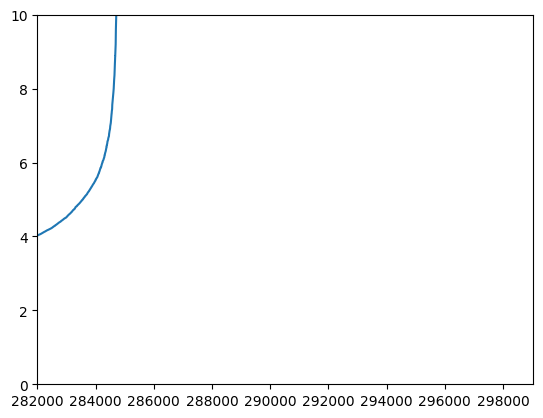

In [22]:
distances = np.sort(distances, axis=0)
if len(distances.shape) > 1:
    distances = distances[:,1]
plt.plot(distances)
plt.xlim(282000,)
plt.ylim(0,10)
plt.show()

In [ ]:
# a DBSCAN of epsilon >= 4 or above has destoryed my machine a few times so going with something lower
# than what is optimal. Epsilon is the maximum distance two points can be whilst being in the same group
# should switch to a OPTICS implementiation for lower memory usage
dbscan = DBSCAN(eps=2, min_samples=min_pts) 
all_data["DBSCAN_cluster"] = dbscan.fit_predict(all_data[use_cols])

In [8]:
all_data.iloc[:, 1:-3].columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [9]:
fraud_clusters = all_data.groupby("DBSCAN_cluster")["Class"].sum()
print(fraud_clusters)

DBSCAN_cluster
-1     467
 0      11
 1       7
 2       0
 3       0
      ... 
 62      0
 63      0
 64      0
 65      1
 66      0
Name: Class, Length: 68, dtype: int64


majority of the fraudulent classes can be clustered into -1 but this does not mean that it is a good predictor

In [10]:
fraud_clusters = all_data.groupby("DBSCAN_cluster")["Class"].mean()
print(fraud_clusters)

DBSCAN_cluster
-1     0.006266
 0     0.000148
 1     0.000107
 2     0.000000
 3     0.000000
         ...   
 62    0.000000
 63    0.000000
 64    0.000000
 65    0.017544
 66    0.000000
Name: Class, Length: 68, dtype: float64


only 0.6% of the data in cluster -1 is fraudulent

In [12]:
fraud_clusters = all_data.groupby("DBSCAN_cluster")["Class"].count()
fraud_clusters

DBSCAN_cluster
-1     74525
 0     74467
 1     65524
 2      8415
 3      7016
       ...  
 62       63
 63       61
 64       87
 65       57
 66       47
Name: Class, Length: 68, dtype: int64

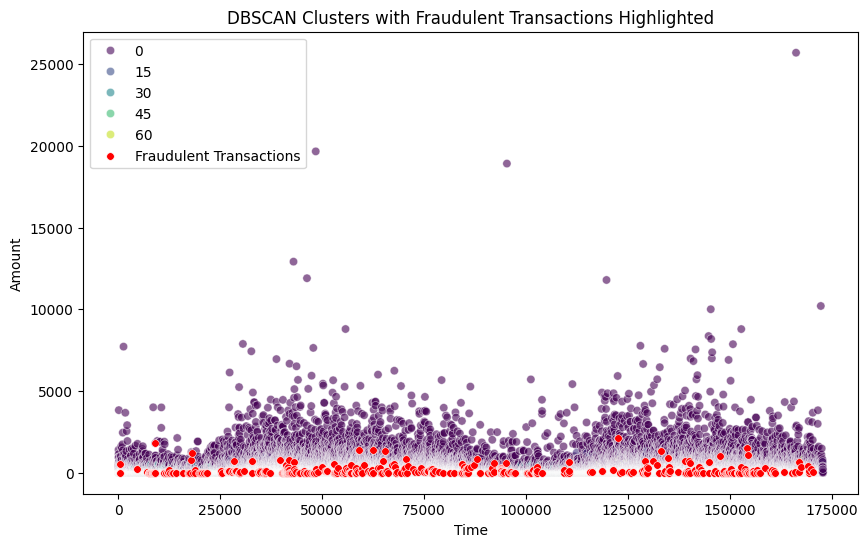

In [14]:
plt.figure(figsize=(10, 6))

# Scatter plot of PCA-reduced data, coloring by cluster
sns.scatterplot(
    x=all_data['Time'], y=all_data['Amount'], 
    hue=all_data["DBSCAN_cluster"], 
    palette="viridis", alpha=0.6
    )

# Overlay fraudulent transactions in red
fraud_mask = all_data["Class"] == 1
sns.scatterplot(
    x=all_data.loc[fraud_mask, 'Time'],
    y=all_data.loc[fraud_mask, 'Amount'],
    color='red',
    label="Fraudulent Transactions",
    s=30
    )

plt.xlabel("Time")
plt.ylabel("Amount")
plt.title("DBSCAN Clusters with Fraudulent Transactions Highlighted")
plt.legend()
plt.show()

In [29]:
# 86401 seconds in a day, 3600 in an hour
bins = list(range(0, 86401, 3600)) 
labels = list(range(len(bins)-1))
all_data['Hour_Bin'] = pd.cut(
    all_data['Time'] % 86400,
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True
    )
all_data['Day'] = all_data['Time'] // 86400

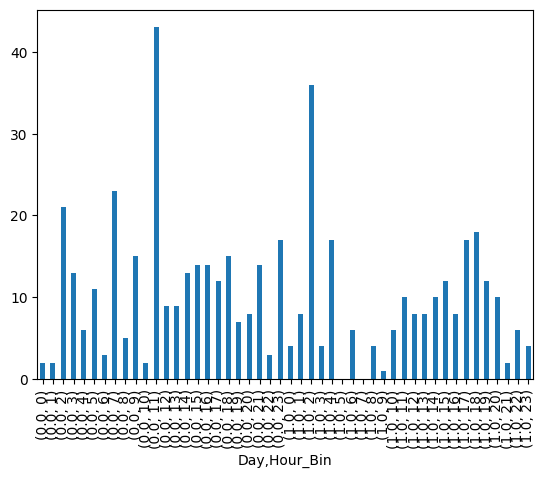

In [36]:
all_data.groupby(['Day', 'Hour_Bin'], observed=True)['Class'].sum().plot.bar()
plt.show()

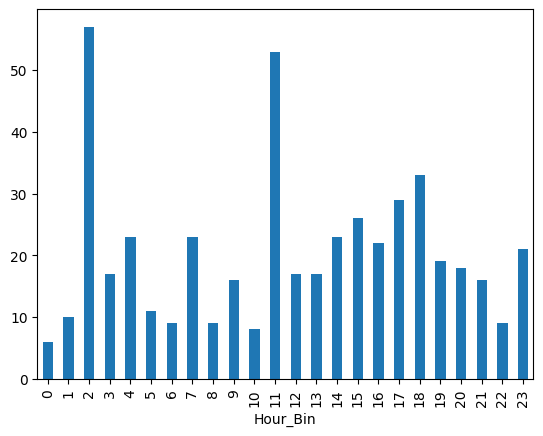

In [38]:
all_data.groupby(['Hour_Bin'], observed=True)['Class'].sum().plot.bar()
plt.show()

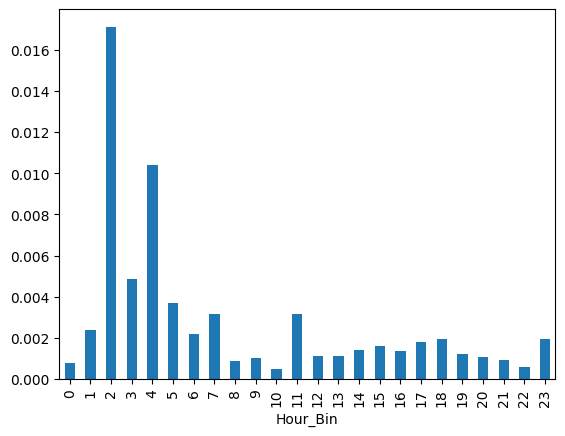

In [39]:
all_data.groupby(['Hour_Bin'], observed=True)['Class'].mean().plot.bar()
plt.show()

Notes after data exploration:
- DBSCAN suggest that the majority of our fradulant data points are in the "noisy" group this is labelled as -1 when considering just the PCA components. This means that even without considering the Time and Amount of the transaction these transactions, for whatever reason, (cannot tell why due to obfuscation) are naturally considered irregular (they do not have enough points near them to be clustered into a group).
- Data is highly unbalanced so the Area Under the Precision-Recall Curve (AUC-PR) metric and F1 score metrics appropriate for model scoring. I think we would prefer to be sure that we correctly identify the fraudulant transactions as being overly cautious has minimal consequences.
- Much of the fraudulant data (~28%) occurs at 0-1 in Amount (possibly as a first attempt)
- There are no NAs within the data
- There does appear to be spikes in fraudulant activity as a percentage of all activity at certain times as well. In absolute terms the fraudlent activity varies as well.
